# 1. Data Observation


<img src='https://assets.website-files.com/62233c592d2a1e009d42f46c/62233c592d2a1e49a742fbf7_cybersecurity-jedha.jpg' >

Vous trouverez dans ce document les étapes à suivre pour réaliser votre TP de Data Observation.

Dans un premier temps, vous avez eu à télécharger un jeu de données au format .csv parmi une liste de banques de données open-source.

L'objectif de ce TP sera de mettre en application les compétences exercées lors des deux précédents TP afin de décrire la constitution de données :
- Nombre de variable,
- Nombre d'individus
- Type de variable,
- Nombre de données manquantes,


Pour rappel, voici les commandes les plus utiles pour intéragir avec l'environement Jupyter:

- "Maj" + "Enter" = Exécuter une cellule
- "a" = créer une cellule en haut
- "b" = créer une cellule en bas
- "dd" = supprimer une cellule
- "echap" = sortir d'une cellule
- "m" = Transformer une cellule de code en cellule de texte.


Liste des [fonctions utilies](https://drive.google.com/file/d/12sKr9R0A8lq2hcWUJDIx3SuyOOl_4hiA/view?usp=sharing) en python.

# 1. Import du Jeu de données

1.1 Installez la bibliothèque seaborn en lançant dans votre terminal (Git Bash sous windows) 

`pip install seaborn`

2.2 Importez dans ce notebook les bibliothèques :    

pandas : `import pandas as pd`

matplotlib : `import matplotlib.pyplot as plt`

seaborn : `import seaborn as sns`

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


1.3 Importez votre jeu de données dans une variable df à l'aide de la commande suivante :    

`df = pd.read_csv("chemin du fichier",  delimiter=',')`


**Attention** : Si les données sont séparées par un point virgule, changez le paramètre `delimiter=';'`

In [14]:
df = pd.read_csv('./data.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


# 2. Description du jeu de données.

2.1 Décrivez vos données :    
- Dimensions,
- Nombre de variable,
- Types des variables,
- Moyenne, ecart-type, quartile et médianne,
- Nombre de valeur manquante.

In [15]:
df.shape

(8068, 11)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [17]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


# 3. Nettoyage du jeu de données.

3.1 Remplacez les données manquantes par la médiane des variable quantitative.

In [43]:
for col in df.columns[df.dtypes != 'object']:
  if df[col].isna().sum() > 0:
    df[col] = df[col].fillna(round(df[col].mean()))

df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience      0
Spending_Score       0
Family_Size          0
Var_1               76
Segmentation         0
dtype: int64

3.2 Si besoin, supprimez les variables qualitatives possédant plus de 30% de données manquantes.

# 4. Data Visualisation


Dans cette partie nous allons observer nos variables à l'aide des bibliothèques matplotlib et seaborn. 

Voici un [lien ressource](https://www.python-graph-gallery.com/) pour vous aider dans l'affichage de vos graphiques.

Au début d'un graphique :

`plt.figure(figsize=(15, 15))`

Donner un titre à son graphique :

`plt.title('Titre')`

A la fin du graphique :

`plt.show()`

## 4.1 Analyse univariée : Affichez deux [histogrames](https://www.python-graph-gallery.com/histogram/) ou deux [Diagrammes circulaires](https://www.python-graph-gallery.com/pie-plot/).
 d'une variable du jeu de données puis dévrivez vos observations :    

<AxesSubplot: xlabel='Age', ylabel='Count'>

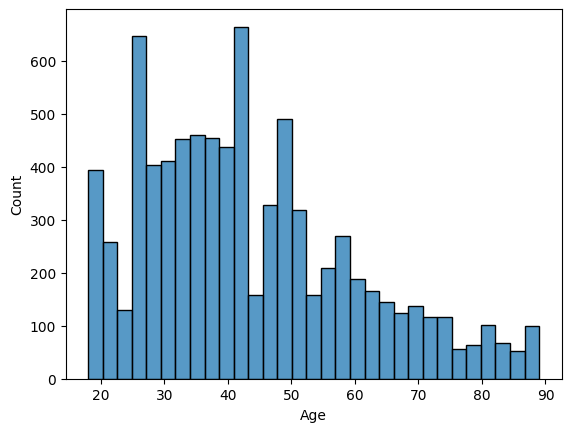

In [44]:
sns.histplot(df.Age)

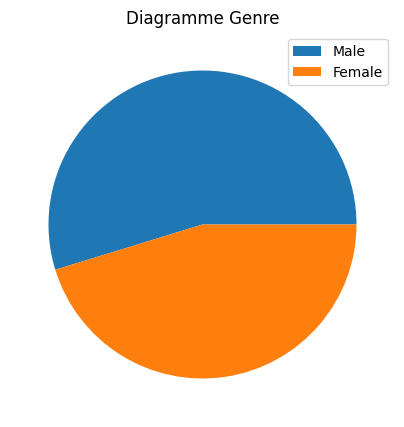

In [58]:
plt.figure(figsize=(5,5))

plt.title('Diagramme Genre')
plt.pie(df.Gender.value_counts())
plt.legend(['Male', 'Female'])
plt.show()

## 4.2 Analyse univariée : Affichez 3 [boites à moustache](https://www.python-graph-gallery.com/boxplot/) des variables du jeu de données puis décrivez vos observations :  

<AxesSubplot: xlabel='Gender', ylabel='Age'>

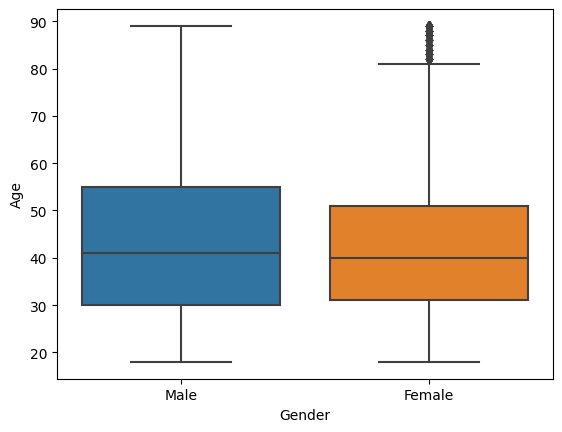

In [60]:
sns.boxplot(x=df.Gender, y=df.Age)

<AxesSubplot: xlabel='Profession', ylabel='Age'>

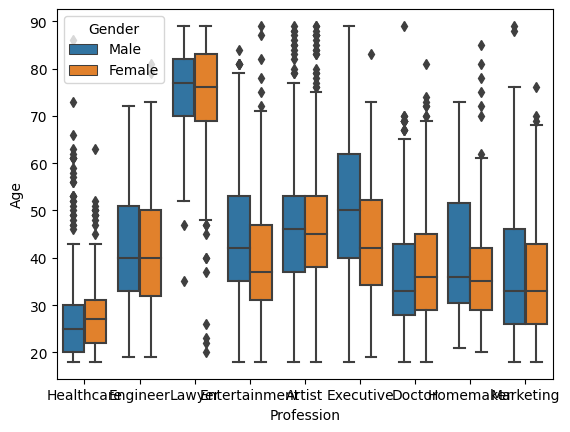

In [63]:
sns.boxplot(x=df.Profession, y=df.Age, hue=df.Gender)

<AxesSubplot: xlabel='Family_Size', ylabel='Age'>

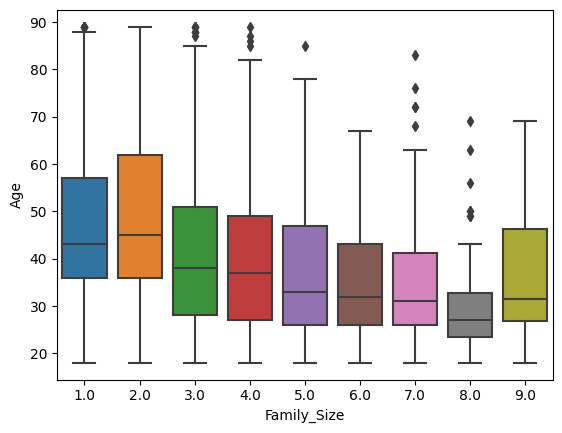

In [25]:
sns.boxplot(x=df.Family_Size, y=df.Age)

## 4.3 Analyse bivariée : Affichez trois [nuages de point](https://www.python-graph-gallery.com/scatter-plot/) qui prend en compte deux variables du jeu de données.

<AxesSubplot: xlabel='Age', ylabel='Work_Experience'>

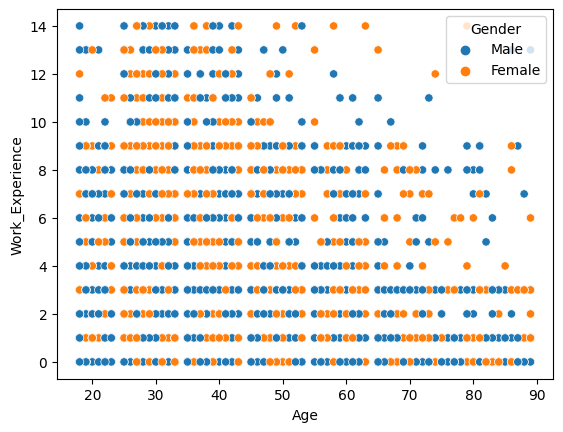

In [66]:
sns.scatterplot(x=df.Age, y=df.Work_Experience, hue=df.Gender)

# 5. Partie 2

## 5.1 Importez un jeu de données puis visualisez ce jeu de données avec au moins 5 graphiques en décrivant vos observations.